# Dogs vs Cats - Part 1

Classify whether images contain either a dog or a cat. Download the data from: https://www.kaggle.com/c/dogs-vs-cats/data

The dataset contains 25,000 images of dogs and cats (12,500 from each class). We will create a new dataset containing 3 subsets, a training set with 8,000 samples of each class (16,000 in total), a validation dataset with 2250 of each class and a test set with 2250 samples of each class.

In [1]:
import os, shutil

This cell below only needs to run once, it creates the directories for the train, test, and validation sets.

In [2]:
base_dir = 'base'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Create directories that contain the training data
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Create directories that contain the validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Create directories that contain the test data
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [3]:
original_dataset_dir = 'train'
base_dir = 'base'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

The cell below also only needs to be run once, it will copy the 25,000 labeled images we downloaded from kaggle and put 16,000 into the training directory, and 4,500 into each of the validation and test directories.

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(10250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(10250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print()

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total validation images:', len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)))
print()

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))
print()

total training cat images: 8000
total training dog images: 8000
total training images: 16000

total validation cat images: 2250
total validation dog images: 2250
total validation images: 4500

total test cat images: 2250
total test dog images: 2250
total test images: 4500



Helper function to visualize accuracy and loss during training.

In [6]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

## Build the first network

In [7]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


Lets look at the output of one of these generators. It yields batches of 224 x 224 RGB images (shape (50, 224, 224, 3)) and binary labels (shape (50,)). There are 50 samples in each batch (the batch size)

In [9]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    print ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50,)


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 50 batches in the generator, so it takes 320 batches to get to 16000 images
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
320/320 [==============================] - 41s 127ms/step - loss: 0.6075 - acc: 0.6561 - val_loss: 0.5568 - val_acc: 0.6987
Epoch 2/30
320/320 [==============================] - 36s 112ms/step - loss: 0.5106 - acc: 0.7503 - val_loss: 0.4832 - val_acc: 0.7673
Epoch 3/30
320/320 [==============================] - 37s 117ms/step - loss: 0.4578 - acc: 0.7846 - val_loss: 0.4820 - val_acc: 0.7669
Epoch 4/30
320/320 [==============================] - 37s 116ms/step - loss: 0.4212 - acc: 0.8036 - val_loss: 0.4066 - val_acc: 0.8153
Epoch 5/30
320/320 [==============================] - 37s 117ms/step - loss: 0.3872 - acc: 0.8253 - val_loss: 0.3851 - val_acc: 0.8229
Epoch 6/30
320/320 [==============================] - 37s 117ms/step - loss: 0.3628 - acc: 0.8407 - val_loss: 0.3735 - val_acc: 0.8304
Epoch 7/30
320/320 [==============================] - 38s 118ms/step - loss: 0.3324 - acc: 0.8504 - val_loss: 0.3902 - val_acc: 0.8220
Epoch 8/30
320/320 [==============================] - 3

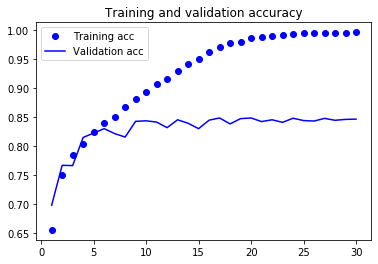

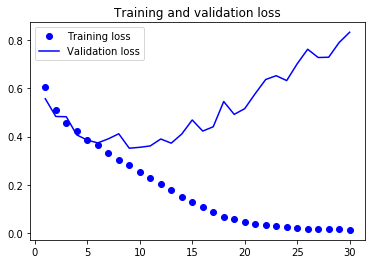

In [11]:
plot_accuracy_and_loss(history)

In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 4500 images belonging to 2 classes.
test acc: 0.8513333294126723


## Add dropout

In [13]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Note the change that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 320 x 50 == 16000
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
320/320 [==============================] - 38s 120ms/step - loss: 0.6227 - acc: 0.6450 - val_loss: 0.5612 - val_acc: 0.7084
Epoch 2/30
320/320 [==============================] - 38s 117ms/step - loss: 0.5270 - acc: 0.7336 - val_loss: 0.4753 - val_acc: 0.7773
Epoch 3/30
320/320 [==============================] - 37s 117ms/step - loss: 0.4779 - acc: 0.7719 - val_loss: 0.4519 - val_acc: 0.7884
Epoch 4/30
320/320 [==============================] - 38s 118ms/step - loss: 0.4370 - acc: 0.7993 - val_loss: 0.4272 - val_acc: 0.7971
Epoch 5/30
320/320 [==============================] - 37s 115ms/step - loss: 0.4055 - acc: 0.8129 - val_loss: 0.4215 - val_acc: 0.8000
Epoch 6/30
320/320 [==============================] - 38s 117ms/step - loss: 0.3838 - acc: 0.8279 - val_loss: 0.3815 - val_acc: 0.8307
Epoch 7/30
320/320 [==============================] - 37s 115ms/step - loss: 0.3624 - acc: 0.8416 - val_loss: 0.3765 - val_acc: 0.8376
Epoch 8/30
320/320 [==============================] - 3

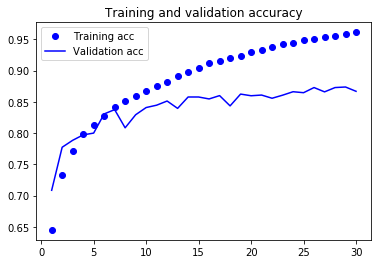

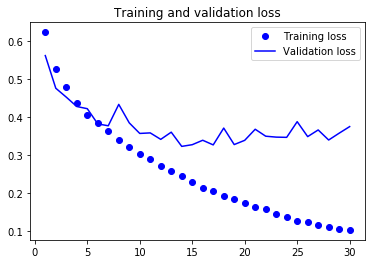

In [16]:
plot_accuracy_and_loss(history)

In [17]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 4500 images belonging to 2 classes.
test acc: 0.8699999941719903


## Data augmentation

Generate a number of random transformations on an image and visualize what it looks like.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

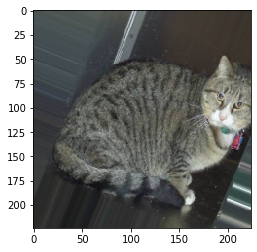

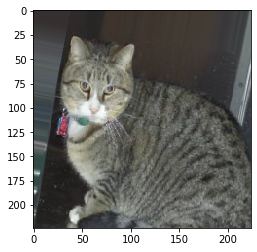

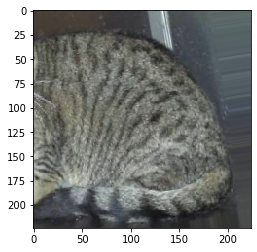

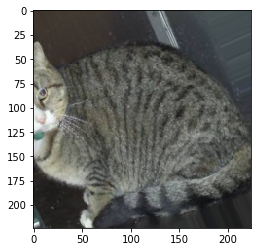

In [20]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4] # Choose one image to augment

img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it

x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break once four images have been created
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Build a model with data augmentation

### Augmented data show training images more than once per epoch (3x per epoch)

Idea here is we're increasing the size of the training set by making changes to existing images

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [23]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, # 960 x 50 = 48000 (we are showing different augmented images more than once per epoch)
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
960/960 [==============================] - 376s 392ms/step - loss: 0.6235 - acc: 0.6406 - val_loss: 0.5897 - val_acc: 0.6609
Epoch 2/30
960/960 [==============================] - 376s 391ms/step - loss: 0.5491 - acc: 0.7155 - val_loss: 0.4752 - val_acc: 0.7691
Epoch 3/30
960/960 [==============================] - 372s 388ms/step - loss: 0.5116 - acc: 0.7455 - val_loss: 0.4243 - val_acc: 0.8049
Epoch 4/30
960/960 [==============================] - 373s 389ms/step - loss: 0.4791 - acc: 0.7673 - val_loss: 0.5564 - val_acc: 0.7309
Epoch 5/30
960/960 [==============================] - 373s 388ms/step - loss: 0.4596 - acc: 0.7827 - val_loss: 0.4371 - val_acc: 0.7987
Epoch 6/30
960/960 [==============================] - 373s 389ms/step - loss: 0.4332 - acc: 0.7974 - val_loss: 0.3481 - val_acc: 0.8491
Epoch 7/30
960/960 [==============================] - 371s 387ms/step - loss: 0.4168 - acc: 0.8090 - val_loss: 0.3582 - val_acc: 0.8376
Epoch 8/30
960/960 [============================

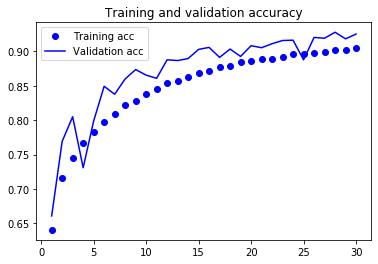

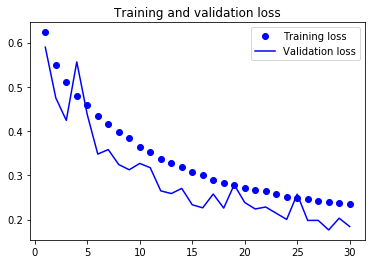

In [24]:
plot_accuracy_and_loss(history)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 4500 images belonging to 2 classes.
